In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
dataset = pd.read_csv('netflix.csv')

## Defining Problem statement:

Analyze the data and generate insights that could help Netflix in ***deciding which type of shows/movies to produce*** and ***how they can grow the business in different countries***

1. decide trnding and most revenue generating movies/shows
2. how to grow/expand business in deferent countries

## Basic analysis

In [ ]:
dataset.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

We can observe that there is missing data, replacing missing country and Cast data with 'Global'


In [ ]:
dataset.fillna('Global')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Global,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Global,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Global,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Global,Global,Global,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Global,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Global,Global,Global,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Count of movies/shows released in each country (sorted)
dataset.groupby(dataset.country).count()['title'].sort_values(ascending = False)

country
United States                                                                          2818
India                                                                                   972
United Kingdom                                                                          419
Japan                                                                                   245
South Korea                                                                             199
                                                                                       ... 
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India            1
Ireland, Canada, United Kingdom, United States                                            1
Ireland, Canada, United States, United Kingdom                                            1
Ireland, France, Iceland, United States, Mexico, Belgium, United Kingdom, Hong Kong       1
Zimbabwe                                                                

In [ ]:
# Count of movies/shows released in each year
dataset.groupby(dataset.release_year).count()['title']

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: title, Length: 74, dtype: int64

In [ ]:
dataset.groupby(dataset.release_year).agg('count')['title']

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: title, Length: 74, dtype: int64

In [ ]:
ds_year=dataset.groupby(dataset.release_year).agg('count')['title']
ds_year

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: title, Length: 74, dtype: int64

<Axes: title={'center': 'count of movies/shows trend'}, xlabel='release_year', ylabel='Count'>

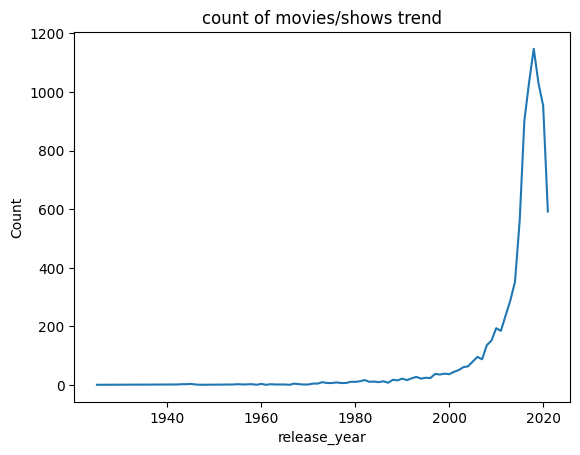

In [ ]:
# Count of movies vs release_year
ds_year.plot(title='count of movies/shows trend', ylabel='Count')

## Extracting all categories

In [ ]:
categories = set()
arr = list(dataset['listed_in'])
for i in arr:
  items = i.split(",")
  for j in items:
    categories.add(j.strip())


In [ ]:
print(categories)

{'Teen TV Shows', 'Dramas', 'Romantic Movies', 'Movies', 'TV Comedies', 'Cult Movies', 'British TV Shows', 'Classic & Cult TV', 'Documentaries', 'Comedies', 'Classic Movies', 'TV Shows', 'Faith & Spirituality', "Kids' TV", 'Sports Movies', 'Korean TV Shows', 'Anime Series', 'Reality TV', 'Horror Movies', 'Docuseries', 'International TV Shows', 'Thrillers', 'TV Thrillers', 'TV Horror', 'Crime TV Shows', 'Music & Musicals', 'Spanish-Language TV Shows', 'Sci-Fi & Fantasy', 'TV Sci-Fi & Fantasy', 'International Movies', 'Stand-Up Comedy', 'Children & Family Movies', 'Anime Features', 'TV Action & Adventure', 'Stand-Up Comedy & Talk Shows', 'TV Dramas', 'Romantic TV Shows', 'Action & Adventure', 'Independent Movies', 'LGBTQ Movies', 'TV Mysteries', 'Science & Nature TV'}


In [ ]:
for i in categories:
  print(f"{i}-->{dataset[dataset['listed_in'].str.contains(i)]['title'].count()}")

Teen TV Shows-->69
Dramas-->3190
Romantic Movies-->616
Movies-->4502
TV Comedies-->581
Cult Movies-->71
British TV Shows-->253
Classic & Cult TV-->28
Documentaries-->869
Comedies-->2255
Classic Movies-->116
TV Shows-->1755
Faith & Spirituality-->65
Kids' TV-->451
Sports Movies-->219
Korean TV Shows-->151
Anime Series-->176
Reality TV-->255
Horror Movies-->357
Docuseries-->395
International TV Shows-->1351
Thrillers-->634
TV Thrillers-->57
TV Horror-->75
Crime TV Shows-->470
Music & Musicals-->375
Spanish-Language TV Shows-->174
Sci-Fi & Fantasy-->327
TV Sci-Fi & Fantasy-->84
International Movies-->2752
Stand-Up Comedy-->399
Children & Family Movies-->641
Anime Features-->71
TV Action & Adventure-->168
Stand-Up Comedy & Talk Shows-->56
TV Dramas-->763
Romantic TV Shows-->370
Action & Adventure-->1027
Independent Movies-->756
LGBTQ Movies-->102
TV Mysteries-->98
Science & Nature TV-->92


## Creating dataframe with categories and counts



In [ ]:
arry = []
for i in categories:
  arry.append(
        {
          'Category': i,
          'Count': dataset[dataset['listed_in'].str.contains(i)]['title'].count()
        }
      )

In [ ]:
categories_df = pd.DataFrame(arry)

<Axes: xlabel='Category'>

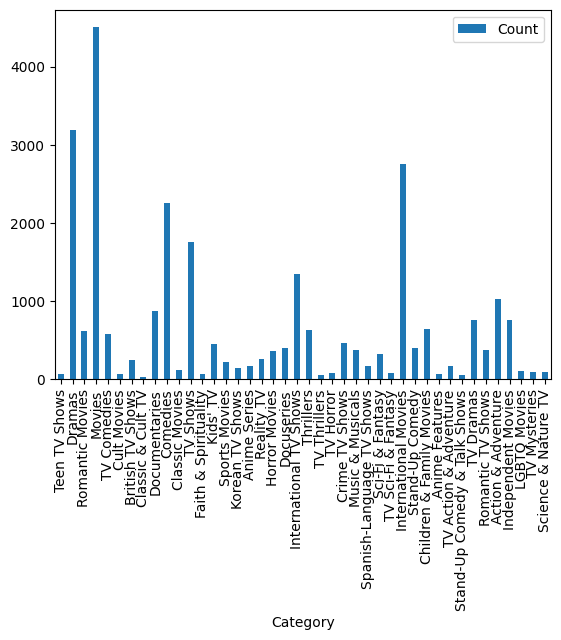

In [ ]:
categories_df.plot(x='Category', kind='bar')

In [ ]:
# Top 10 category/tags netflix has published/added
categories_df.sort_values('Count', ascending=False).head(10)

,Category,Count
3,Movies,4502
1,Dramas,3190
29,International Movies,2752
9,Comedies,2255
11,TV Shows,1755
20,International TV Shows,1351
37,Action & Adventure,1027
8,Documentaries,869
35,TV Dramas,763
38,Independent Movies,756


In [ ]:
# least 10 category/tags netflix has published/added
categories_df.sort_values('Count', ascending=False).tail(10)

,Category,Count
41,Science & Nature TV,92
28,TV Sci-Fi & Fantasy,84
23,TV Horror,75
32,Anime Features,71
5,Cult Movies,71
0,Teen TV Shows,69
12,Faith & Spirituality,65
22,TV Thrillers,57
34,Stand-Up Comedy & Talk Shows,56
7,Classic & Cult TV,28


## Market analysis

<Axes: xlabel='country'>

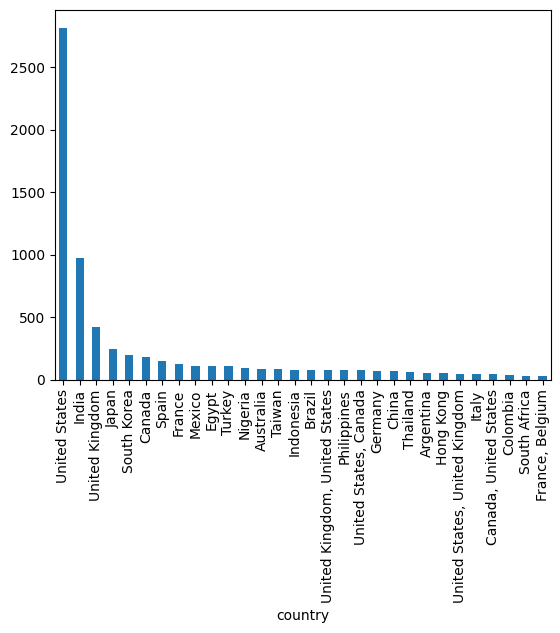

In [ ]:
dataset.groupby(dataset.country).count()['title'].sort_values(ascending = False).head(30).plot(kind='bar')

## Market expansion
### excluding the top 3 markets and understanding the categories from the top 30 markets

In [ ]:
future_market_country_table = dataset.groupby(dataset.country).count()['title'].sort_values(ascending = False).head(30).tail(27)
future_countries_set = list(future_market_country_table.index)
#countries_set = set(future_market_country_table['country'])
print(future_countries_set)

['Japan', 'South Korea', 'Canada', 'Spain', 'France', 'Mexico', 'Egypt', 'Turkey', 'Nigeria', 'Australia', 'Taiwan', 'Indonesia', 'Brazil', 'United Kingdom, United States', 'Philippines', 'United States, Canada', 'Germany', 'China', 'Thailand', 'Argentina', 'Hong Kong', 'United States, United Kingdom', 'Italy', 'Canada, United States', 'Colombia', 'South Africa', 'France, Belgium']


In [ ]:
dataset[dataset['country'].isin(future_countries_set)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
25,s26,TV Show,Love on the Spectrum,NaN,Brooke Satchwell,Australia,"September 21, 2021",2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV",Finding love can be hard for anyone. For young...
49,s50,TV Show,Castle and Castle,NaN,"Richard Mofe-Damijo, Dakore Akande, Bimbo Manu...",Nigeria,"September 15, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas","A pair of high-powered, successful lawyers fin..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8778,s8779,Movie,Yes or No 2,Saratswadee Wongsomphet,"Supanart Jittaleela, Sushar Manaying, Nisa Boo...",Thailand,"November 8, 2018",2012,TV-PG,112 min,"International Movies, LGBTQ Movies, Romantic M...","No longer university girls, Kim and Pie face n..."
8779,s8780,Movie,Yes or No 2.5,Kirati Nakintanon,"Supanart Jittaleela, Pimpakan Bangchawong, Cha...",Thailand,"November 8, 2018",2015,TV-PG,107 min,"International Movies, LGBTQ Movies, Romantic M...",Roommates Wine and Pie find their lives turned...
8789,s8790,Movie,You Changed My Life,Cathy Garcia-Molina,"John Lloyd Cruz, Sarah Geronimo, Rayver Cruz, ...",Philippines,"February 27, 2019",2009,TV-PG,116 min,"Comedies, Dramas, International Movies",Laida and Miggy think they've found perfect ha...
8792,s8793,Movie,Young Tiger,Mu Chu,"Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...",Hong Kong,"November 1, 2016",1973,NR,81 min,"Action & Adventure, International Movies","Aided only by a tough female police officer, a..."


In [ ]:
# analysing the list of directors in these markets
directors=dataset[dataset['country'].isin(future_countries_set)].groupby('director').agg('count')['title'].sort_values(ascending=False)
print(directors)

director
Raúl Campos, Jan Suter    16
Cathy Garcia-Molina       13
Hakan Algül                8
Yılmaz Erdoğan             8
Justin G. Dyck             7
                          ..
Hitoshi Namba              1
Hong Won-ki                1
Hong-seon Kim              1
Houssam El-Din Mustafa     1
Ken Kwapis                 1
Name: title, Length: 1184, dtype: int64


## Analysis & Insights
### 1. Stand-Up Comedy & Talk Shows are one of the least invested by netflix  but has seen an overall spike in the recent time by public opinion. Hence,One of the vector for netflix to invest should be on Standup comedy and talk shows


### 2. US, India, UK are the top 3 markets for Netflix
### 3. The next major market is Japan and it is the hub for anime and Netflix has not invested more on the Anime Features or shows as per the data. Hence, it is intuitive that Netflix should invest in the Anime and exclusives for the Japanese Markets.

### 4. Japan, South Korea, Canada, Spain and France are the next major markets which Netflix should invest upon. Investing and movies and shows directed by the directors of these regions would increase the domain more